<a href="https://colab.research.google.com/github/sanaaria/Master-thesis/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [4]:
pip install ampligraph

In [5]:
import ampligraph as ampligraph

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import ampligraph as ampligraph
from ampligraph.datasets import load_from_csv

In [7]:
# from ampligraph.evaluation import train_test_split_no_unseen,generate_corruptions_for_fit
# # from ampligraph.evaluation import train_test_split_no_unseen
from ampligraph.datasets import load_from_csv


In [8]:
# from ampligraph.evaluation import evaluate_performance
# As of version 1.1.1, Ampligraph removed the 'evaluate_performance' function and instead introduced the 'mrr_score', 'hits_at_k', and 'mean_rank' functions to calculate metrics for evaluating model performance.
# If you are using version 2.0.1, you should be able to use the 'mrr_score', 'hits_at_k', and 'mean_rank' functions to calculate the desired metrics. Here's an example of how you can do this
from ampligraph.evaluation import mrr_score

In [9]:
from ampligraph.evaluation import mrr_score, hits_at_n_score ,mr_score

In [10]:
# from ampligraph.evaluation.common import generate_corruptions
from ampligraph.latent_features.layers.corruption_generation import CorruptionGenerationLayerTrain

In [11]:
from ampligraph.latent_features.layers.scoring import ComplEx

In [12]:
from ampligraph.latent_features.layers.scoring import TransE

In [13]:
from ampligraph.latent_features.layers.scoring import DistMult

In [14]:
# from ampligraph.utils import save_model,restore_model
from ampligraph.utils import save_model
from ampligraph.utils import restore_model

In [15]:
from tensorflow.python.keras.models import Model

In [16]:
from tensorflow.python.keras.layers import Dense, Dropout

In [17]:
from keras.layers import LSTM, Lambda, Layer, Dropout

In [18]:
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,Adagrad,Adamax

In [19]:
from tensorflow import keras

In [20]:
#load data
################################################################

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#data example: yamanishi_08
dt_08 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/dt_all_08.txt',delimiter='\t',header=None)
# the script reads a csv file using pandas' read_csv function. This function reads the file from the specified path, which in this case is
# /content/drive/MyDrive/data/yamanishi_08/dt_all_08.txt.

dt_08.columns = ['head','relation','tail']
# the columns of the DataFrame dt_08 are set using the columns attribute. The column names are 'head', 'relation', and 'tail'.

In [22]:
dt_08.head()

,head,relation,tail
0,D00002,DRUG_TARGET,hsa:10
1,D00448,DRUG_TARGET,hsa:10
2,D00037,DRUG_TARGET,hsa:100
3,D00155,DRUG_TARGET,hsa:100
4,D00021,DRUG_TARGET,hsa:10056


In [23]:
#kg
# ##This code is written in Python using the pandas library.
# #The goal of this code is to load two text files,
# which contain Knowledge Graph (KG) data, and concatenate them into a single pandas DataFrame.
# The KG data in these text files consists of triples (head, relation, tail), which are essentially edges in a graph.
# The 'head' is the subject, the 'relation' is the predicate, and the 'tail' is the object.

kg1 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/kegg_kg.txt',delimiter='\t',header=None)
# The pd.read_csv() function reads the specified file and creates a DataFrame. The delimiter='\t' argument tells pandas to use tabs as separators.
# The header=None argument tells pandas that the first row of the file does not contain column names.

kg2 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/yamanishi_uniprot_kg.txt',delimiter='\t',header=None)
#This code is similar to the previous one.

kg = pd.concat([kg1,kg2])
#Concatenate the two DataFrames.
#The pd.concat() function concatenates the input DataFrames into a single DataFrame.

kg.index = range(len(kg))
#Reset the index of the concatenated DataFrame.
#The index attribute of a DataFrame represents the index of the rows.
#This line of code resets the index of the concatenated DataFrame so that it starts from 0 and increments by 1.

kg.columns = ['head','relation','tail']
#Set the column names of the concatenated DataFrame.
#This line of code assigns new column names to the concatenated DataFrame.


#The resulting kg DataFrame contains the combined KG data from both text files.
# The DataFrame has three columns: 'head', 'relation', and 'tail'. The rows represent the triples (head, relation, tail) in the KG.

In [24]:
print(kg.shape)

(95672, 3)


In [25]:
print(kg.dtypes)

head        object
relation    object
tail        object
dtype: object


In [26]:
print(kg['relation'].value_counts())

relation
BIOLOGICAL_PROCESS        12403
PATHWAY_GENE              10026
PATHWAY_DRUG               7093
GENE_PATHAWY               5551
CELL_COMPONENT             5199
MOLECULAR_FUNCTION         4875
INTERACT_WITH              4623
GENE_MOTIF                 4374
DRUG_BRITE                 3354
PROTEIN_PATHWAY            3189
PATHWAY_COMPOUND_DRUG      2972
DRUG_GROUP                 2714
PATHWAY_COMPOUND           2686
GENE_BRITE                 2572
DOMAIN                     2204
TYPE                       1966
DRUG_EFFICACY              1696
FAMILY                     1584
HOMOLOGOUS_SUPERFAMILY     1554
DRUG_TARGET_PATHWAY        1340
DRUG_ATC_C5                 902
DRUG_ATC_C4                 902
DRUG_ATC_C3                 894
DRUG_ATC_C2                 877
DRUG_PATHWAY_MAP            841
DRUG_ATC_C1                 823
PATHWAY_DISEASE             810
GENE_NETWORK                804
GENE_EC4                    753
GENE_DISEASE                709
DRUG_CLASS                  703

In [27]:
print(kg['head'].nunique())
print(kg['relation'].nunique())
print(kg['tail'].nunique())

3108
48
25226


In [28]:
# مثال بررسی ارتباط بین PROTEIN_PATHWAY و BIOLOGICAL_PROCESS
protein_pathways = kg[kg['relation'] == 'PROTEIN_PATHWAY']
biological_processes = kg[kg['relation'] == 'BIOLOGICAL_PROCESS']

# پیوندها یا همپوشانی‌ها را بررسی کنید
merged = pd.merge(protein_pathways, biological_processes, on='head', how='inner')
print(merged)


           head       relation_x         tail_x          relation_y  \
0      hsa:5834  PROTEIN_PATHWAY  R-HSA-6798695  BIOLOGICAL_PROCESS   
1      hsa:5834  PROTEIN_PATHWAY  R-HSA-6798695  BIOLOGICAL_PROCESS   
2      hsa:5834  PROTEIN_PATHWAY    R-HSA-70221  BIOLOGICAL_PROCESS   
3      hsa:5834  PROTEIN_PATHWAY    R-HSA-70221  BIOLOGICAL_PROCESS   
4      hsa:5914  PROTEIN_PATHWAY   R-HSA-383280  BIOLOGICAL_PROCESS   
...         ...              ...            ...                 ...   
76157  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76158  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76159  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76160  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76161  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   

           tail_y  
0      GO:0005980  
1      GO:0043312  
2      GO:0005980  
3      GO:0043312  
4      GO:0043277  
...           ...  
76157  

In [29]:
print(kg.isnull().sum())

head        0
relation    0
tail        0
dtype: int64


In [30]:
print(kg.describe())

            head            relation       tail
count      95672               95672      95672
unique      3108                  48      25226
top     hsa04080  BIOLOGICAL_PROCESS  KEGG_GENE
freq        2314               12403        989


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# # نمودار توزیع برای نوع داده‌ها
# sns.countplot(data=kg, x='relation')
# plt.xticks(rotation=90)
# plt.show()


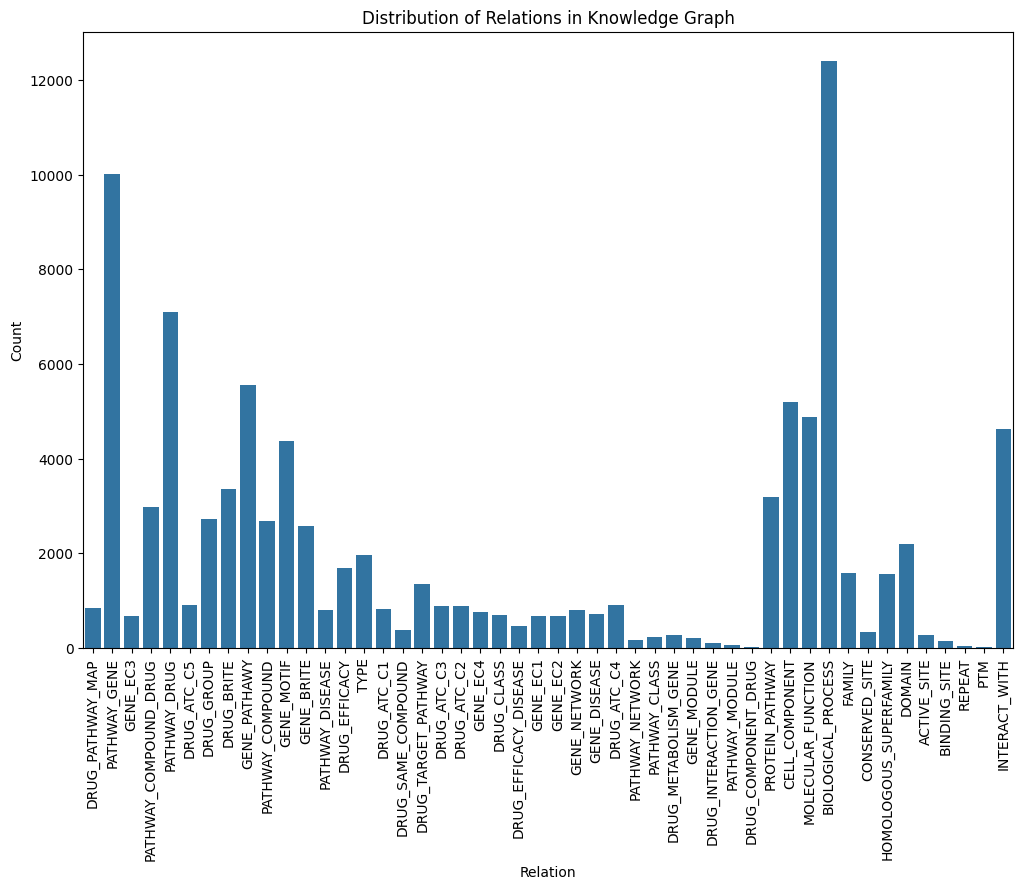

In [34]:
# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=kg, x='relation')
plt.xticks(rotation=90)
plt.title('Distribution of Relations in Knowledge Graph')
plt.xlabel('Relation')
plt.ylabel('Count')
plt.show()

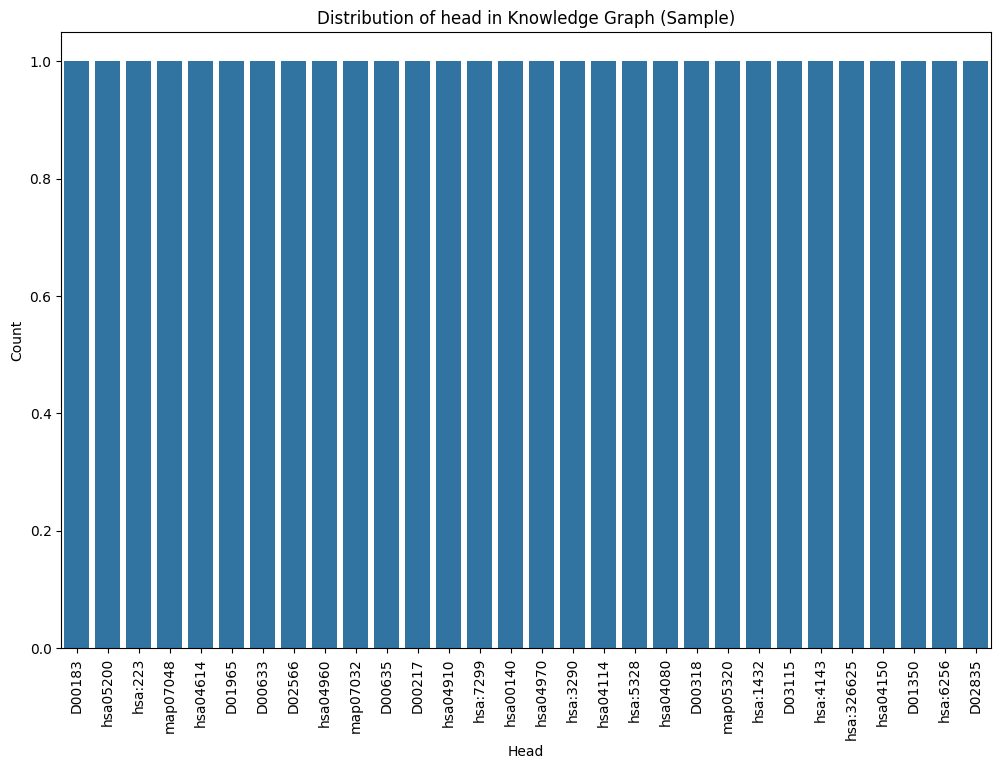

In [50]:
# انتخاب نمونه‌ای کوچک از داده‌ها
kg_sample = kg.head(30)  # انتخاب 20 ردیف اول

# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=kg_sample, x='head')
plt.xticks(rotation=90)
plt.title('Distribution of head in Knowledge Graph (Sample)')
plt.xlabel('Head')
plt.ylabel('Count')
plt.show()

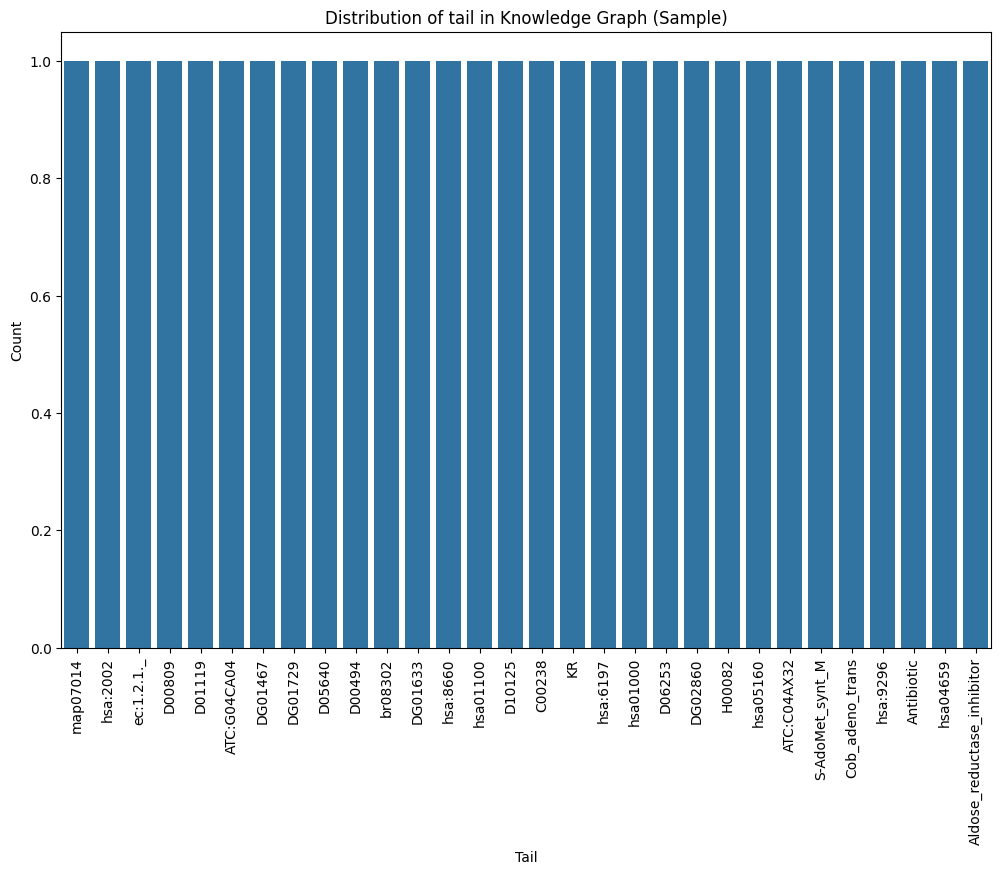

In [52]:
# انتخاب نمونه‌ای کوچک از داده‌ها
kg_sample = kg.head(30)  # انتخاب 20 ردیف اول

# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=kg_sample, x='tail')
plt.xticks(rotation=90)
plt.title('Distribution of tail in Knowledge Graph (Sample)')
plt.xlabel('Tail')
plt.ylabel('Count')
plt.show()

In [56]:
print(kg.head(30))

          head               relation                        tail
0       D00183       DRUG_PATHWAY_MAP                    map07014
1     hsa05200           PATHWAY_GENE                    hsa:2002
2      hsa:223               GENE_EC3                  ec:1.2.1._
3     map07048  PATHWAY_COMPOUND_DRUG                      D00809
4     hsa04614           PATHWAY_DRUG                      D01119
5       D01965            DRUG_ATC_C5                 ATC:G04CA04
6       D00633             DRUG_GROUP                     DG01467
7       D02566             DRUG_GROUP                     DG01729
8     hsa04960           PATHWAY_DRUG                      D05640
9     map07032  PATHWAY_COMPOUND_DRUG                      D00494
10      D00635             DRUG_BRITE                     br08302
11      D00217             DRUG_GROUP                     DG01633
12    hsa04910           PATHWAY_GENE                    hsa:8660
13    hsa:7299           GENE_PATHAWY                    hsa01100
14    hsa0

In [35]:
# print("kg1:")
# print(kg1['relation'].value_counts())
# print("kg2:")
# print(kg2['relation'].value_counts())


In [36]:
pip install networkx matplotlib


In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# # بارگذاری داده‌ها
# #kg1 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/kegg_kg.txt', delimiter='\t', header=None)
# #kg2 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/yamanishi_uniprot_kg.txt', delimiter='\t', header=None)
# #kg = pd.concat([kg1, kg2])
# kg.index = range(len(kg))
# #kg.columns = ['head', 'relation', 'tail']

# # ساخت گراف
# G = nx.MultiDiGraph()  # استفاده از MultiDiGraph برای پشتیبانی از چندین لبه با ویژگی‌های مشابه

# # افزودن گره‌ها و لبه‌ها به گراف
# for index, row in kg.iterrows():
#     G.add_edge(row['head'], row['tail'], relation=row['relation'])

# # رسم گراف
# pos = nx.spring_layout(G, seed=42)  # موقعیت‌یابی گره‌ها
# plt.figure(figsize=(50, 50))  # اندازه تصویر

# # رسم گره‌ها
# nx.draw_networkx_nodes(G, pos, node_size=500)
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")

# # رسم برچسب‌ها
# edge_labels = nx.get_edge_attributes(G, 'relation')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# plt.title('Knowledge Graph Visualization')
# plt.show()


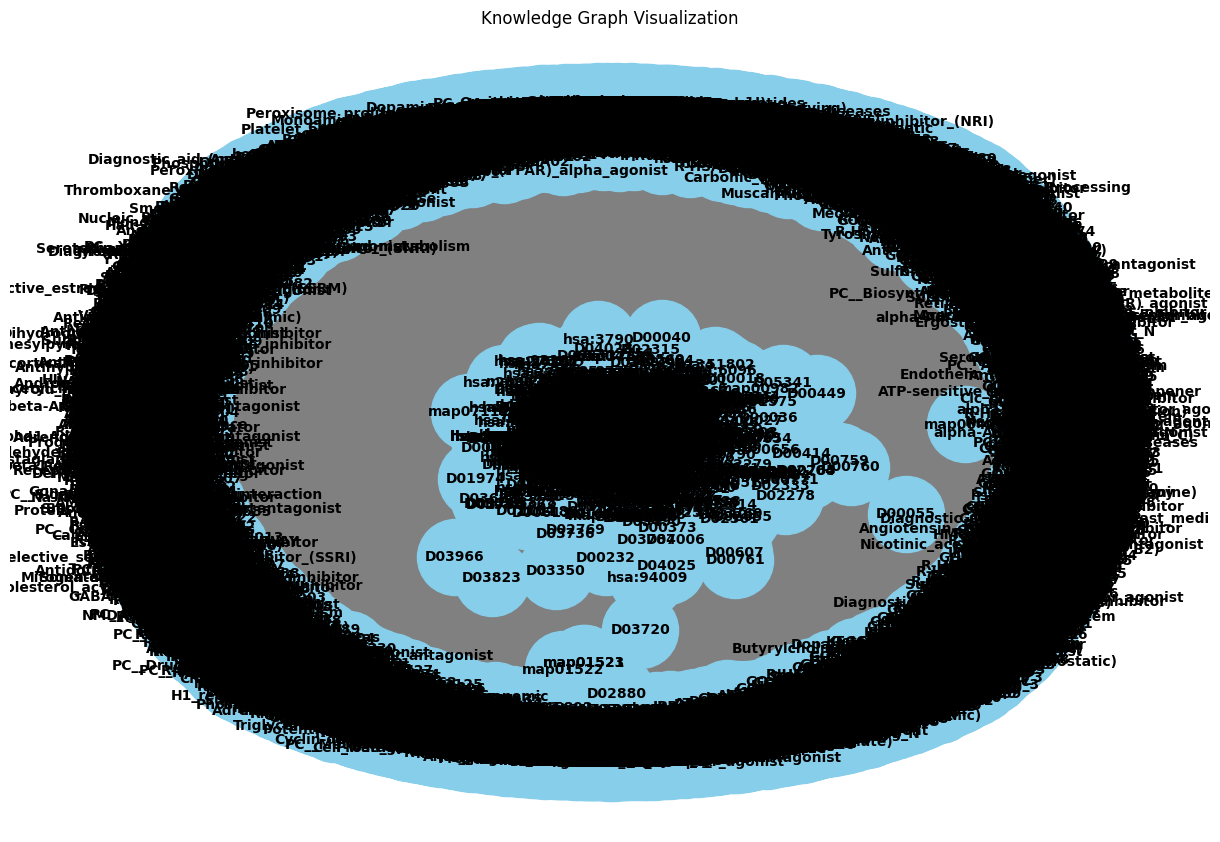

In [38]:
# ایجاد گراف
G = nx.from_pandas_edgelist(kg, 'head', 'tail', edge_attr=True, create_using=nx.DiGraph())

# رسم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # تعیین موقعیت نودها
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title('Knowledge Graph Visualization')
plt.show()

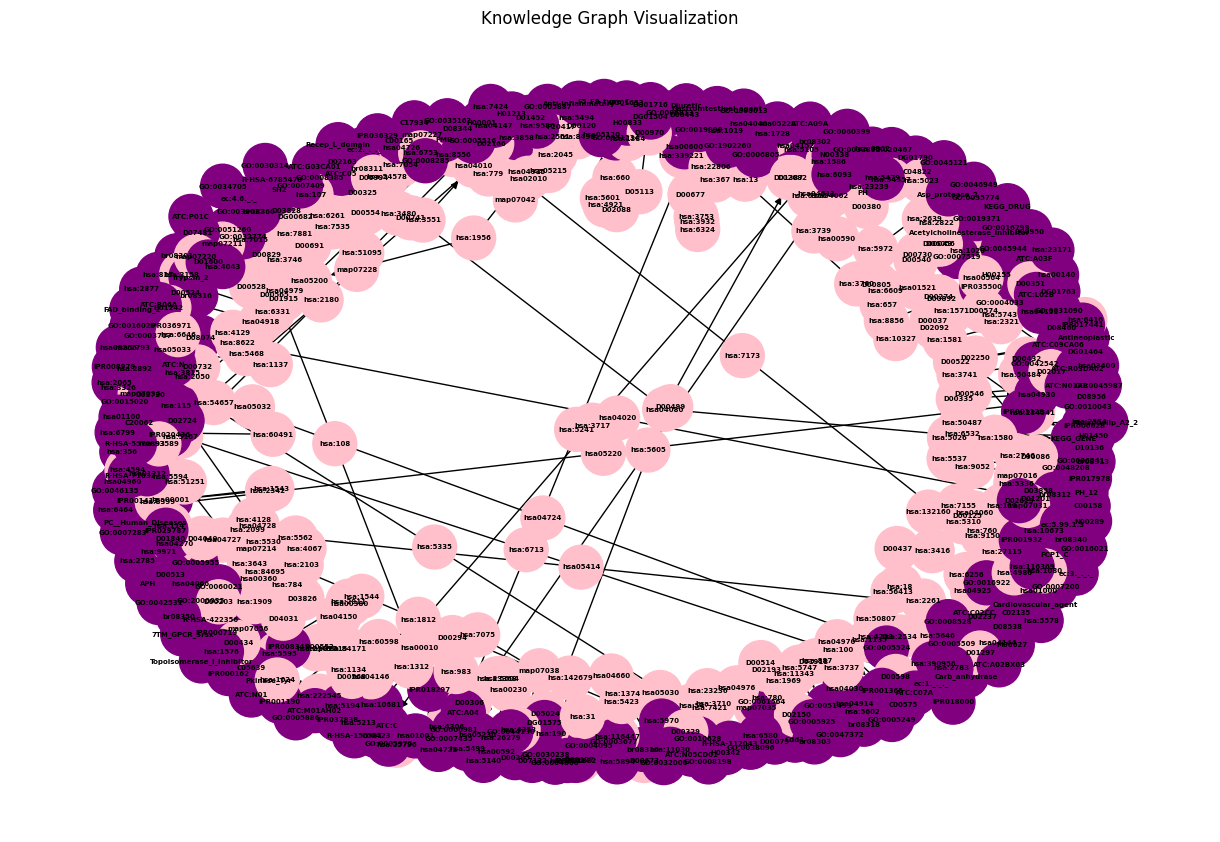

In [48]:
# انتخاب یک نمونه کوچک از داده‌ها برای رسم گراف واضح‌تر
kg_sample = kg.sample(n=300, random_state=42)  # انتخاب 50 نمونه تصادفی

# ایجاد گراف
G = nx.from_pandas_edgelist(kg_sample, 'head', 'tail', edge_attr=True, create_using=nx.DiGraph())

# تعیین رنگ‌ها برای نودها
node_colors = []
for node in G.nodes():
    if node in kg_sample['head'].values:
        node_colors.append('pink')
    else:
        node_colors.append('purple')

# رسم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # تعیین موقعیت نودها
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=5, font_weight="bold", edge_color="black")
plt.title('Knowledge Graph Visualization')
plt.show()